### (1) Import Libraries

In [264]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use ('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) # Adjusts the configuration of the plots we will careate

### (2) Data info

In [265]:
 df = pd.read_csv('movies.csv')
 df.info()
 # df.dtypes # this one is also helpful in case you just want to know the types of every variable

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [266]:
#df.head()
df.tail()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0
7667,Tee em el,NaN,Horror,2020,"August 19, 2020 (United States)",5.7,7.0,Pereko Mosia,Pereko Mosia,Siyabonga Mabaso,South Africa,NaN,NaN,PK 65 Films,102.0


### (3) Quantifying and Dropping missing data (Nulls)

In [267]:
#Option 1
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print(np.round_(pct_missing,4))
    

0.0
0.01
0.0
0.0
0.0003
0.0004
0.0004
0.0
0.0004
0.0001
0.0004
0.2831
0.0246
0.0022
0.0005


In [268]:
#Option 2
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}'.format(col,np.round_(pct_missing,4)))

name - 0.0
rating - 0.01
genre - 0.0
year - 0.0
released - 0.0003
score - 0.0004
votes - 0.0004
director - 0.0
writer - 0.0004
star - 0.0001
country - 0.0004
budget - 0.2831
gross - 0.0246
company - 0.0022
runtime - 0.0005


The variable with the largest percentage of Nulls is Budget (28% approximately)

### (4) Data Cleaning

#### (4.1) Changing data type

In [269]:
# Drop rows with missing values
df = df.dropna()
df.info()
# 5421/7668 (71% of the data)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5421 entries, 0 to 7652
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      5421 non-null   object 
 1   rating    5421 non-null   object 
 2   genre     5421 non-null   object 
 3   year      5421 non-null   int64  
 4   released  5421 non-null   object 
 5   score     5421 non-null   float64
 6   votes     5421 non-null   float64
 7   director  5421 non-null   object 
 8   writer    5421 non-null   object 
 9   star      5421 non-null   object 
 10  country   5421 non-null   object 
 11  budget    5421 non-null   float64
 12  gross     5421 non-null   float64
 13  company   5421 non-null   object 
 14  runtime   5421 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 677.6+ KB


In [270]:
# Changing floats to integers
df['budget']= df['budget'].astype('int64')
df['gross']= df['gross'].astype('int64')
#df.info()

#### (4.2) Extracting a new column

In [271]:
# Changing an object to string
# Option 1: does not work, it turns the year into a month name.
df['year_rel'] = df['released'].astype(str).str[:4]
#df.head()

In [272]:
# Option 2: Places the correct year as string
df['year_rel'] = df['released'].astype(str).str.split(', ').str[-1].astype(str).str[:4]
#df.head()

In [273]:
# Option 3: Places the correct year as integer
df['year_rel'] = df['released'].str.extract(pat = '([0-9]{4})').astype(int)
#df.head() # I like this one better, leaves the year_rel as integer

In [274]:
# Ordering the dataset based on the variable 'gross'
df.sort_values(by=['gross'], inplace=False, ascending = False).head(5)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_rel
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018


In [275]:
#Use this code if you want to see the whole dataset and scroll through it. I find it not a good practice. Prefere head() or tail()
#pd.set_option('display.max_rows', None)

#### (4.3) Drop duplicates

In [276]:
# Drop duplicates
df['company'].drop_duplicates().sort_values(ascending = False).head()

7129        thefyzz
5664    micro_scope
4007       i5 Films
6793     i am OTHER
6420           erbp
Name: company, dtype: object

In [277]:
# Another way to drop duplicates
df = df.drop_duplicates()
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_rel
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980


#### (4.4) Replacing entries

In [278]:
walt_count = df['company'].str.contains('Walt').sum()
if walt_count>0:
    print ("There are {m} Walt".format(m=walt_count))


There are 129 Walt


In [279]:
df_Walt= df[df['company'].str.contains('Walt')]
df_Walt.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_rel
75,The Last Flight of Noah's Ark,G,Adventure,1980,"June 25, 1980 (United States)",5.8,1300.0,Charles Jarrott,Ernest K. Gann,Elliott Gould,United States,6000000,11000000,Walt Disney Productions,97.0,1980
117,The Fox and the Hound,G,Animation,1981,"July 10, 1981 (United States)",7.3,87000.0,Directors,Daniel P. Mannix,Mickey Rooney,United States,12000000,63456988,Walt Disney Animation Studios,83.0,1981
222,Tron,PG,Action,1982,"July 9, 1982 (United States)",6.8,115000.0,Steven Lisberger,Steven Lisberger,Jeff Bridges,United States,17000000,33000525,Walt Disney Productions,96.0,1982
303,Night Crossing,PG,Drama,1982,"February 5, 1982 (United States)",6.5,1300.0,Delbert Mann,John McGreevey,John Hurt,United Kingdom,10000000,8000000,Walt Disney Productions,107.0,1982
381,Something Wicked This Way Comes,PG,Fantasy,1983,"April 29, 1983 (United States)",6.8,8600.0,Jack Clayton,Ray Bradbury,Jason Robards,United States,19000000,8400000,Walt Disney Productions,95.0,1983


In [280]:
df_Walt['company'].value_counts()

Walt Disney Pictures             107
Walt Disney Animation Studios     17
Walt Disney Productions            5
Name: company, dtype: int64

In [281]:
df['company'].replace('Walt Disney Animation Studios', 'Walt Disney Pictures',inplace=True)

In [282]:
df['company'].replace('Walt Disney Productions', 'Walt Disney Pictures', inplace=True)

In [283]:
df_Walt= df[df['company'].str.contains('Walt')]
df_Walt['company'].value_counts()

Walt Disney Pictures    129
Name: company, dtype: int64

### (5) Plotting data

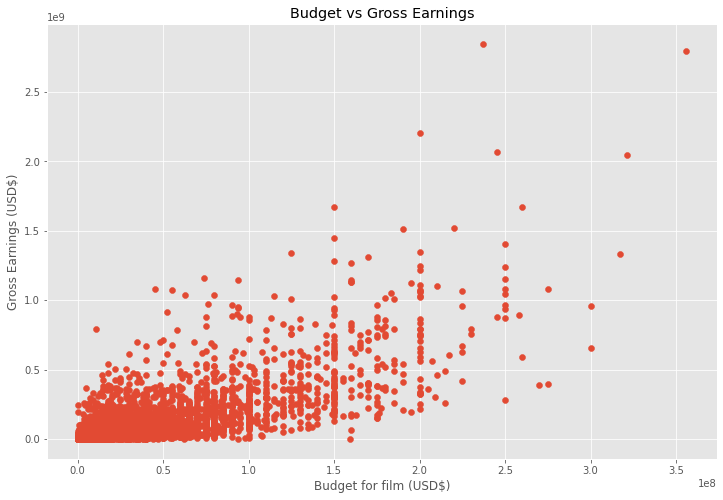

In [284]:
# Scatter plot Budget vs Gross

plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Budget for film (USD$)')
plt.ylabel('Gross Earnings (USD$)')
plt.show()


<AxesSubplot:xlabel='budget', ylabel='gross'>

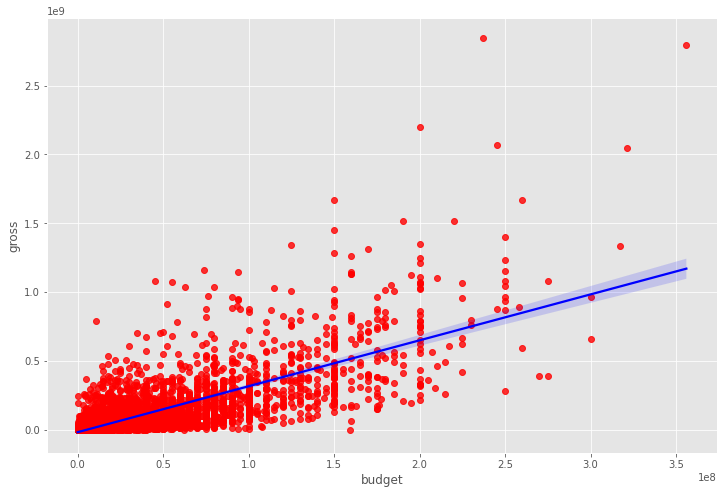

In [285]:
#  Plot the Budget vs. Gross using seaborn
sns.regplot(x='budget', y= 'gross', data=df, scatter_kws={"color":"red"},line_kws={"color":"blue"})

### (6) Correlation 

#### (6.0) Default Correlation

In [286]:
df_corr = df.corr() #deafult
df_corr
# pearson is deafult, 1st and most use correlation model (same as scale-standard covariance)
# kendall is the 2nd correlation model that can be used with .corr(). 
# Spearman is the 3rd correlation model that can be used with .corr().

,year,score,votes,budget,gross,runtime,year_rel
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077,0.998726
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068,0.061923
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303,0.203098
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695,0.320312
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796,0.268721
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000,0.075294
year_rel,0.998726,0.061923,0.203098,0.320312,0.268721,0.075294,1.000000


There are two main highlights:
(i) High correlation between budget and gross (74% approximately);

(ii) High correlation between votes and gross (61% approximately);

(iii) Relevant correlation between scores and votes (47% approximately);

(iv) Relevant correlation between budget and votes (44% approximately);

(v) The rest of the correlations are below 40%.

#### (6.1) Correlation methods

In [287]:
df.corr(method = 'pearson')

,year,score,votes,budget,gross,runtime,year_rel
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077,0.998726
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068,0.061923
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303,0.203098
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695,0.320312
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796,0.268721
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000,0.075294
year_rel,0.998726,0.061923,0.203098,0.320312,0.268721,0.075294,1.000000


In [288]:
df.corr(method = 'kendall')

,year,score,votes,budget,gross,runtime,year_rel
year,1.000000,0.039389,0.296512,0.220833,0.239539,0.064824,0.991304
score,0.039389,1.000000,0.350185,-0.006406,0.124943,0.292254,0.043400
votes,0.296512,0.350185,1.000000,0.346274,0.553625,0.205344,0.293044
budget,0.220833,-0.006406,0.346274,1.000000,0.512057,0.231278,0.213719
gross,0.239539,0.124943,0.553625,0.512057,1.000000,0.176979,0.232372
runtime,0.064824,0.292254,0.205344,0.231278,0.176979,1.000000,0.064793
year_rel,0.991304,0.043400,0.293044,0.213719,0.232372,0.064793,1.000000


In [289]:
df.corr(method = 'spearman')


,year,score,votes,budget,gross,runtime,year_rel
year,1.000000,0.057741,0.427623,0.312886,0.351045,0.095444,0.998694
score,0.057741,1.000000,0.495409,-0.009971,0.183192,0.412155,0.063674
votes,0.427623,0.495409,1.000000,0.493461,0.745793,0.300621,0.422988
budget,0.312886,-0.009971,0.493461,1.000000,0.692958,0.330794,0.302535
gross,0.351045,0.183192,0.745793,0.692958,1.000000,0.257400,0.340529
runtime,0.095444,0.412155,0.300621,0.330794,0.257400,1.000000,0.095507
year_rel,0.998694,0.063674,0.422988,0.302535,0.340529,0.095507,1.000000


#### (6.2) Correlation visualization

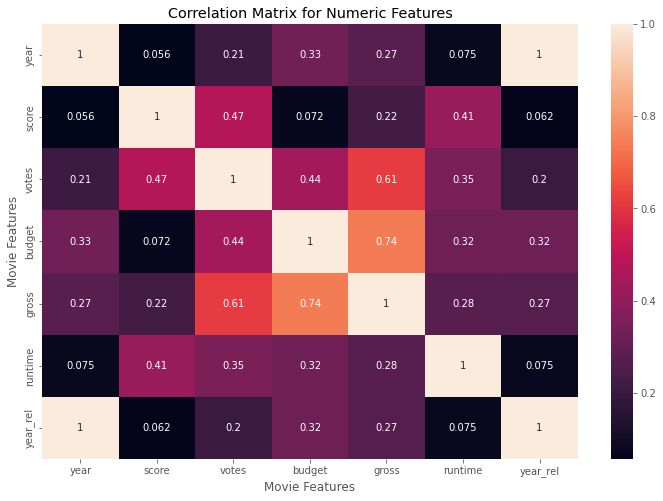

In [290]:
sns.heatmap(df_corr,annot=True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

#### (6.3) Turning objects into categories and giving them cat.codes

In [291]:
df_numerized = df

In [292]:
for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

In [293]:
#df_numerized

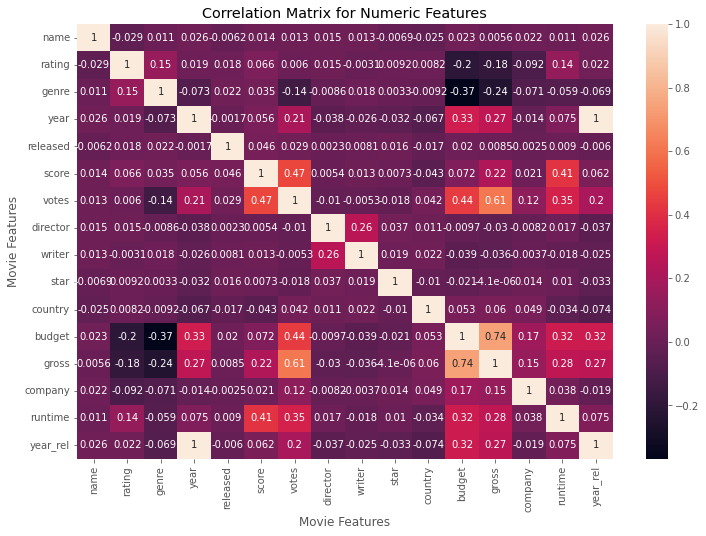

In [294]:
corr_matrix = df_numerized.corr(method='pearson')
sns.heatmap(corr_matrix,annot=True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

#### (6.4) Unstacking and sorting correlation values

In [295]:
correlation_mat = df_numerized.corr()
corr_pairs = correlation_mat.unstack()
corr_pairs

name      name        1.000000
          rating     -0.029234
          genre       0.010996
          year        0.025542
          released   -0.006152
          score       0.014450
          votes       0.012615
          director    0.015246
          writer      0.012880
          star       -0.006882
          country    -0.025490
          budget      0.023392
          gross       0.005639
          company     0.021697
          runtime     0.010850
          year_rel    0.025542
rating    name       -0.029234
          rating      1.000000
          genre       0.147796
          year        0.019499
          released    0.018083
          score       0.065983
          votes       0.006031
          director    0.014656
          writer     -0.003149
          star        0.009196
          country     0.008230
          budget     -0.203946
          gross      -0.181906
          company    -0.092296
          runtime     0.140792
          year_rel    0.022021
genre   

In [296]:
sorted_pairs =  corr_pairs.sort_values()
sorted_pairs

genre     budget     -0.368523
budget    genre      -0.368523
gross     genre      -0.244101
genre     gross      -0.244101
rating    budget     -0.203946
budget    rating     -0.203946
rating    gross      -0.181906
gross     rating     -0.181906
votes     genre      -0.135990
genre     votes      -0.135990
company   rating     -0.092296
rating    company    -0.092296
country   year_rel   -0.073569
year_rel  country    -0.073569
year      genre      -0.073167
genre     year       -0.073167
          company    -0.071282
company   genre      -0.071282
genre     year_rel   -0.069147
year_rel  genre      -0.069147
year      country    -0.066748
country   year       -0.066748
genre     runtime    -0.059237
runtime   genre      -0.059237
score     country    -0.043051
country   score      -0.043051
writer    budget     -0.039466
budget    writer     -0.039466
year      director   -0.038354
director  year       -0.038354
          year_rel   -0.037371
year_rel  director   -0.037371
gross   

#### (6.7) Looking only at Corr values of interest 

In [297]:
high_corr = sorted_pairs[(sorted_pairs)>0.5]
high_corr

gross     votes       0.614751
votes     gross       0.614751
gross     budget      0.740247
budget    gross       0.740247
year      year_rel    0.998726
year_rel  year        0.998726
name      name        1.000000
company   company     1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
director  director    1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
runtime   runtime     1.000000
year_rel  year_rel    1.000000
dtype: float64

This data shows that Companies names do not have a high correlation with gross earnings.
Votes and budget have the highest correlation to gross earnings.